In [3]:
import rdkit
from rdkit.Chem import Descriptors


In [11]:
# file_path = '../data/10gs_complex.pdb'
file_path = '../data/refined-set/1a1e/1a1e_protein.pdb'

mol = rdkit.Chem.rdmolfiles.MolFromPDBFile(file_path)

# Review `rdkit` processing workflow

In [12]:
# Calculate molecular weight
mol_weight = Descriptors.MolWt(mol)

# Calculate logP
logP = Descriptors.MolLogP(mol)

# Calculate the number of hydrogen bond donors
hb_donors = Descriptors.NumHDonors(mol)

# Calculate the number of hydrogen bond acceptors
hb_acceptors = Descriptors.NumHAcceptors(mol)

# Print the calculated descriptors
print(f"Molecular Weight: {mol_weight}")
print(f"LogP: {logP}")
print(f"Number of Hydrogen Bond Donors: {hb_donors}")
print(f"Number of Hydrogen Bond Acceptors: {hb_acceptors}")


Molecular Weight: 24048.27299999998
LogP: -199.72450000001209
Number of Hydrogen Bond Donors: 353
Number of Hydrogen Bond Acceptors: 297


### Handling Multiple Molecules

In [ ]:
from rdkit import Chem

# Assuming you have a list of file paths for individual molecules
file_paths = ['molecule1.pdb', 'molecule2.pdb', 'molecule3.pdb']

# Initialize an empty list to store the molecules
molecules = []

# Loop through each file, load the molecule, and add it to the list
for path in file_paths:
    mol = Chem.MolFromPDBFile(path)
    if mol is not None:  # Ensure the molecule was successfully loaded
        molecules.append(mol)
    else:
        print(f"Failed to load molecule from {path}")

### Preprocessing a Protein-Ligand Complex

In [8]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Path to the .pdb file containing just the ligand of interest
ligand_file_path = '../data/10gs_complex.pdb'

# Load the ligand as an RDKit molecule object
ligand_mol = Chem.MolFromPDBFile(ligand_file_path)

if ligand_mol is not None:
    # Calculate desired descriptors for the ligand
    mol_weight = Descriptors.MolWt(ligand_mol)
    logP = Descriptors.MolLogP(ligand_mol)
    # Output the descriptors
    print(f"Molecular Weight: {mol_weight}, LogP: {logP}")
else:
    print("Failed to load the ligand molecule.")



Molecular Weight: 49834.81600000148, LogP: -543.7523999999661


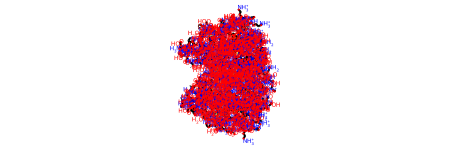

In [9]:
ligand_mol 

In [10]:
mol = rdkit.Chem.rdmolfiles.MolFromPDBFile(ligand_file_path )

# Calculate molecular weight
mol_weight = Descriptors.MolWt(mol)

# Calculate logP
logP = Descriptors.MolLogP(mol)

# Calculate the number of hydrogen bond donors
hb_donors = Descriptors.NumHDonors(mol)

# Calculate the number of hydrogen bond acceptors
hb_acceptors = Descriptors.NumHAcceptors(mol)

# Print the calculated descriptors
print(f"Molecular Weight: {mol_weight}")
print(f"LogP: {logP}")
print(f"Number of Hydrogen Bond Donors: {hb_donors}")
print(f"Number of Hydrogen Bond Acceptors: {hb_acceptors}")


Molecular Weight: 49834.81600000148
LogP: -543.7523999999661
Number of Hydrogen Bond Donors: 647
Number of Hydrogen Bond Acceptors: 593


# Descriptors Calculation Pipeline for `refined-set` 

In [38]:
import os
from rdkit import Chem
from rdkit.Chem import Descriptors
from tqdm import tqdm 

def calculate_descriptors(file_path):
    """
    Given a file path to a .mol file, calculate and return molecular descriptors.
    """
    mol = Chem.MolFromPDBFile(file_path)
    if mol:
        mol_weight = Descriptors.MolWt(mol)
        logP = Descriptors.MolLogP(mol)
        hb_donors = Descriptors.NumHDonors(mol)
        hb_acceptors = Descriptors.NumHAcceptors(mol)
        return {
            'MolWt': mol_weight,
            'LogP': logP,
            'NumHDonors': hb_donors,
            'NumHAcceptors': hb_acceptors
        }
    else:
        return None

def process_directory(directory_path):
    """
    Recursively process directories to find and process .mol files.
    """
    data = []
    for root, dirs, files in tqdm(os.walk(directory_path)):
        for filename in files:
            if filename.endswith(".pdb"):  # Adjust based on your file format
                file_path = os.path.join(root, filename)
                descriptor_data = calculate_descriptors(file_path)
                if descriptor_data:
                    descriptor_data['filename'] = filename
                    data.append(descriptor_data)
        # if len(data) > 10: 
        #     break
            
    return data

# Define the path to the directory containing the molecule files
directory_path = '../data/refined-set/'

# Process the directory and calculate descriptors
data = process_directory(directory_path)
data

42it [00:24,  1.44s/it][18:44:02] Explicit valence for atom # 2194 H, 2, is greater than permitted
169it [01:50,  1.04it/s][18:45:31] Explicit valence for atom # 4224 O, 3, is greater than permitted
293it [03:14,  3.42it/s][18:46:52] Explicit valence for atom # 1164 O, 3, is greater than permitted
317it [03:22,  4.44it/s][18:47:04] Explicit valence for atom # 486 O, 3, is greater than permitted
441it [04:52,  1.34s/it][18:48:30] Explicit valence for atom # 297 O, 3, is greater than permitted
[18:48:30] Explicit valence for atom # 1566 O, 3, is greater than permitted
597it [06:28,  3.21it/s][18:50:06] Explicit valence for atom # 1763 O, 3, is greater than permitted
646it [07:01,  3.78it/s][18:50:39] Explicit valence for atom # 5303 O, 3, is greater than permitted
667it [07:08,  2.86it/s][18:50:49] Explicit valence for atom # 2112 C, 5, is greater than permitted
765it [08:53,  1.84it/s][18:52:31] Explicit valence for atom # 827 C, 5, is greater than permitted
[18:52:31] Explicit valence 

[{'MolWt': 5739.09399999998,
  'LogP': -21.337600000000272,
  'NumHDonors': 67,
  'NumHAcceptors': 80,
  'filename': '6ugp_pocket.pdb'},
 {'MolWt': 33257.93199999998,
  'LogP': -401.53330000001716,
  'NumHDonors': 395,
  'NumHAcceptors': 360,
  'filename': '6ugp_protein.pdb'},
 {'MolWt': 5135.6889999999685,
  'LogP': -51.53509999999973,
  'NumHDonors': 75,
  'NumHAcceptors': 69,
  'filename': '4rdn_pocket.pdb'},
 {'MolWt': 19685.829999999885,
  'LogP': -209.0192000000074,
  'NumHDonors': 252,
  'NumHAcceptors': 216,
  'filename': '4rdn_protein.pdb'},
 {'MolWt': 81259.23800000029,
  'LogP': -1026.4828999999381,
  'NumHDonors': 990,
  'NumHAcceptors': 926,
  'filename': '4mo4_protein.pdb'},
 {'MolWt': 5012.623999999973,
  'LogP': -38.32160000000023,
  'NumHDonors': 63,
  'NumHAcceptors': 73,
  'filename': '4mo4_pocket.pdb'},
 {'MolWt': 16647.376999999884,
  'LogP': -210.9181000000015,
  'NumHDonors': 190,
  'NumHAcceptors': 180,
  'filename': '3s0b_protein.pdb'},
 {'MolWt': 6191.16699999

In [39]:
import pandas as pd

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=['filename', 'MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors'])

# Save the DataFrame to a CSV file
df


,filename,MolWt,LogP,NumHDonors,NumHAcceptors
0,6ugp_pocket.pdb,5739.094,-21.3376,67,80
1,6ugp_protein.pdb,33257.932,-401.5333,395,360
2,4rdn_pocket.pdb,5135.689,-51.5351,75,69
3,4rdn_protein.pdb,19685.830,-209.0192,252,216
4,4mo4_protein.pdb,81259.238,-1026.4829,990,926
...,...,...,...,...,...
10557,6r0v_protein.pdb,13601.656,-118.0592,168,148
10558,1ydt_protein.pdb,41955.410,-359.7092,577,505
10559,1ydt_pocket.pdb,7693.181,-43.6970,98,107
10560,5umx_protein.pdb,30805.753,-390.5435,358,334


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('ligand_descriptors.csv', index=False)

# Ensure pandas is installed: pip install pandas